# Analysis of heights for printed ring-shaped test structures

## 0. Imports

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy import interpolate
import glob
from matplotlib.patches import Circle
files = glob.glob('./RingHeights/*.txt')

## 1. Read height images, find the center of each shape, and calculate the radial averages and distributions

67 67
62 68
62 67
66 67


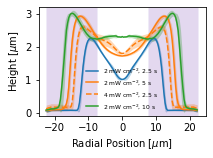

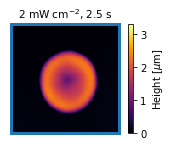

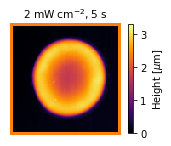

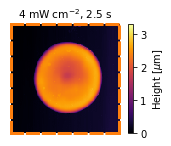

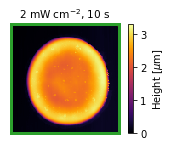

In [3]:
def loc_center(dat):
    thresh = 0.5
    i0 = int(dat.shape[0]/2)
    j0 = 0
    for loop in np.arange(3):
        prof = dat[i0,:]    
        prof = prof-np.min(prof)
        prof = prof/np.max(prof)
        
        j0 = int(0.5*(np.where(prof>thresh)[0].min()+np.where(prof>thresh)[0].max()))
        prof = dat[:,j0]    
        prof = prof-np.min(prof)
        prof = prof/np.max(prof)
        
        i0 = int(0.5*(np.where(prof>thresh)[0].min()+np.where(prof>thresh)[0].max()))
    return (i0,j0)

# Polar coord to cartesian
def pol2cart(theta, rho):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y

labels = ['2 mW cm$^{-2}$, 2.5 s','2 mW cm$^{-2}$, 5 s','4 mW cm$^{-2}$, 2.5 s','2 mW cm$^{-2}$, 10 s','4 mW cm$^{-2}$, 5 s',]
colors = ['C0','C1','C1','C2','C2']
linestyles = ['-','-','--','-','--']
for n,file in enumerate([files[3],files[4],files[6],files[2]]):
    dat = np.loadtxt(file)
    dat = dat-np.min(dat)
    # Locate center
    i0,j0 = loc_center(dat)
    print(i0,j0)
    # Generate pixel coordinates
    i = np.arange(0,dat.shape[0])-i0
    j = np.arange(0,dat.shape[1])-j0
    
    ii, jj = np.meshgrid(i,j)
    
    # Generate slices coordinates
    max_r = np.min(dat.shape)/2
    n_slice = 90
    
    r = np.arange(-max_r,max_r)
    t = np.arange(0,n_slice)*2*np.pi/n_slice
    
    rr, tt = np.meshgrid(r,t)
    iiq, jjq = pol2cart(tt,rr)
    
    # Interpolate slices
    f = interpolate.interp2d(j,i,dat,fill_value=0)
    
    slices = np.zeros_like(iiq)
    
    for a in np.arange(iiq.shape[0]):
        for b in np.arange(iiq.shape[1]):
            slices[a,b] = f(iiq[a,b],jjq[a,b])

    
    # Compute mean and variation of slice values
    mean = np.mean(slices,axis=0)
    upp = mean+np.std(slices,axis=0)
    low = mean-np.std(slices,axis=0)
   
    # Plot mean as line with variation as shading
    plt.figure(num=3,figsize = (3,2)) 
    plt.plot(r/128*45,mean*1e6,color=colors[n],label=labels[n],linestyle=linestyles[n])
    plt.fill_between(r/128*45, upp*1e6, low*1e6, color=colors[n], alpha='0.3',linewidth=0.0)
    plt.legend(frameon=False,fontsize = 6,loc='lower center')
    plt.xlabel('Radial Position [$\mu$m]')
    plt.ylabel('Height [$\mu$m]')
    plt.fill_between([-22.5,-7.5],[-.1,-.1],[3.2,3.2],facecolor=(.3,0,.6,.04), edgecolor=(0,0,0,0))
    plt.fill_between([22.5,7.5],[-.1,-.1],[3.2,3.2],facecolor=(.3,0,.6,.04), edgecolor=(0,0,0,0))
    plt.ylim(-.1,3.2)
#     plt.savefig('./RingHeights/eq_dose_plots.svg')

centers = np.array([[67,67],[62,68],[62,67],[66,67]])
for n,file in enumerate([files[3],files[4],files[6],files[2]]):

    dat = np.loadtxt(file)
    dat = dat-np.min(dat)
    
    plt.figure(figsize = (3,2))
    plt.imshow(dat*1e6, vmin=0,vmax=3.3, extent=[0, 45, 0, 45], cmap='inferno') 
    
    ax = plt.gca()
    ax.add_patch(Circle((62,62), radius=25, color='red'))
    
    plt.colorbar(ticks=[0,1,2,3]).set_label(label='Height [$\mu$m]')
    plt.yticks([])
    plt.xticks([])    
    ax=plt.gca()
    plt.setp(ax.spines.values(), color=colors[n],linewidth=3,linestyle=linestyles[n])
    plt.title(labels[n], fontsize = 10.5)
#     plt.savefig(file+'_withscale.png',dpi=600,transparent=True)

## 2. Draw the digital mask to scale

Text(0.5, 1.0, 'Digital Mask')

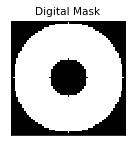

In [7]:
dim = int(45/.75+3)
mask = np.zeros((dim,dim))

for x in range(dim):
    for y in range(dim):
        if((x-31)**2+(y-31)**2>100):
            mask[x,y]=1
        if((x-31)**2+(y-31)**2>900):
            mask[x,y]=0


plt.figure(figsize=(3*63/60,2*63/60))
plt.imshow(mask,cmap='gray')
plt.xticks([])
plt.yticks([])
ax=plt.gca()
# plt.setp(ax.spines.values(), color='C4',linewidth=3)
plt.title('Digital Mask', fontsize = 10.5)
